# 케라스 훑어보기
## 1. 전처리: Preprocessing
- Tokenizer(): 토큰화와 정수 인코딩을 위해 사용합니다.
- pad_sequence(): 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [2]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

## 2. 워드 임베딩: Word Embedding
- 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것
- 원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다.

    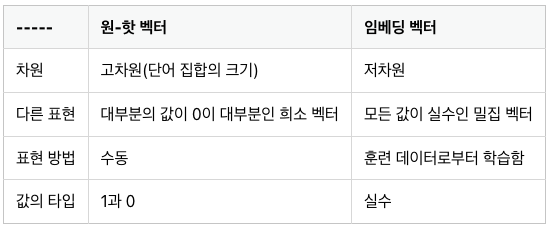
- Embedding(): 정수 인코딩이 된 단어들을 입력(2D 정수 텐서)을 받아서 임베딩을 수행합니다.

In [ ]:
# 아래는 pseudo-code입니다.

# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
# +------------+------------+
# |   index    | embedding  |
# +------------+------------+
# |     0      | [1.2, 3.1] |
# |     1      | [0.1, 4.2] |
# |     2      | [1.0, 3.1] |
# |     3      | [0.3, 2.1] |
# |     4      | [2.2, 1.4] |
# |     5      | [0.7, 1.7] |
# |     6      | [4.1, 2.0] |
# +------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.


## 3. 모델링: Modeling
- Sequential()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(...) # 층 추가
model.add(...) # 층 추가
model.add(...) # 층 추가

# Embedding layer
model = Sequential()
model.add(Embedding(vocab_size, output_dim, input_length))

# FC layer
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. 컴파일(Compile)과 훈련(Training)
- comile(): 모델을 기계가 이해할 수 있도록 컴파일 합니다.
- fit(): 모델을 학습합니다. 

In [6]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
# verbose = 학습 중 출력되는 문구를 설정, 0=아무것도 출력하지 않습니다, 1=훈련의 진행도를 보여주는 진행 막대를 보여줍니다, 2=미니 배치마다 손실 정보를 출력합니다.

## 5. 평가(Evaluation)와 예측(Prediction)
- evaluate(): 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)

## 6. 모델의 저장(Save)과 로드(Load)
- save(): 인공 신경망 모델을 hdf5 파일에 저장합니다.
- load_model(): 저장해둔 모델을 불러옵니다.

In [ ]:
model.save("model_name.h5")

from tensorflow.keras.models import load_model
model = load_model("model_name.h5")